In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical # Import to_categorical


In [ ]:
# Path to the folder containing images
DF_H = pd.read_excel('/content/spectrum_egg.xlsx', sheet_name = 'H')
DF_H.head()

,Order,Name,Label,Egg,Weight,12493.333,12489.476,12485.619,12481.762,12477.905,...,3633.442,3629.585,3625.728,3621.871,3618.014,3614.157,3610.3,3606.442,3602.585,3598.728
0,1,00_01,0,1,73.7,0.429222,0.430305,0.429334,0.428511,0.426882,...,1.622323,1.623304,1.629913,1.645662,1.668851,1.698641,1.720810,1.726034,1.722744,1.724873
1,2,00_03,0,3,79.6,0.432149,0.431781,0.429764,0.428958,0.430335,...,1.593637,1.617020,1.628716,1.631663,1.646086,1.663646,1.666122,1.657079,1.652423,1.656898
2,3,00_04,0,4,72.0,0.427626,0.427216,0.428770,0.431302,0.432952,...,1.600379,1.606711,1.610668,1.614685,1.627192,1.643476,1.651262,1.665348,1.690206,1.708468
3,4,00_05,0,5,70.8,0.423460,0.422239,0.424951,0.427999,0.426864,...,1.570099,1.586028,1.601183,1.605930,1.615777,1.634891,1.650406,1.659312,1.663418,1.665496
4,5,00_06,0,6,76.4,0.413754,0.412657,0.413435,0.413184,0.411858,...,1.554479,1.573687,1.597159,1.610432,1.624715,1.629835,1.617119,1.619603,1.639526,1.654550


In [ ]:
# Path to the folder containing images
DF_H = pd.read_excel('/content/spectrum_egg.xlsx', sheet_name = 'V')
DF_H.head()

,Order,Name,Label,Egg,Weight,12485.619,12481.762,12477.905,12474.048,12470.19,...,3641.157,3637.3,3633.442,3629.585,3625.728,3621.871,3618.014,3614.157,3610.3,3606.442
0,1,00_01,0,1,73.7,0.855058,0.852526,0.848881,0.845506,0.841916,...,3.442144,3.490311,3.539570,3.587502,3.609443,3.598877,3.585218,3.607897,3.666421,3.736923
1,2,00_03,0,3,79.6,0.807740,0.807272,0.809040,0.812170,0.812919,...,3.222760,3.236086,3.265270,3.313939,3.354944,3.372078,3.390368,3.422181,3.424293,3.386838
2,3,00_04,0,4,72.0,0.829760,0.829256,0.828250,0.828653,0.830860,...,3.373950,3.409126,3.430953,3.445980,3.465618,3.495836,3.517768,3.526759,3.539501,3.566066
3,4,00_05,0,5,70.8,0.853696,0.852564,0.850915,0.852063,0.853782,...,3.395867,3.417355,3.449739,3.500298,3.544571,3.553700,3.536312,3.538956,3.570441,3.602716
4,5,00_06,0,6,76.4,0.835459,0.839800,0.842982,0.842238,0.837850,...,3.370855,3.401273,3.436354,3.488557,3.538649,3.568114,3.581902,3.590968,3.588351,3.582562


In [ ]:
DF_H.index = DF_H['Order']
XH = DF_H.drop(['Order', 'Name', 'Label','Egg','Weight'],  axis = 1)
YH = DF_H['Label']
XH

,12485.619,12481.762,12477.905,12474.048,12470.190,12466.333,12462.476,12458.619,12454.762,12450.905,...,3641.157,3637.300,3633.442,3629.585,3625.728,3621.871,3618.014,3614.157,3610.300,3606.442
Order,,,,,,,,,,,,,,,,,,,,,
1,0.855058,0.852526,0.848881,0.845506,0.841916,0.839727,0.842849,0.850508,0.856330,0.856685,...,3.442144,3.490311,3.539570,3.587502,3.609443,3.598877,3.585218,3.607897,3.666421,3.736923
2,0.807740,0.807272,0.809040,0.812170,0.812919,0.810560,0.807716,0.806207,0.804934,0.802168,...,3.222760,3.236086,3.265270,3.313939,3.354944,3.372078,3.390368,3.422181,3.424293,3.386838
3,0.829760,0.829256,0.828250,0.828653,0.830860,0.832238,0.832838,0.833695,0.833084,0.831132,...,3.373950,3.409126,3.430953,3.445980,3.465618,3.495836,3.517768,3.526759,3.539501,3.566066
4,0.853696,0.852564,0.850915,0.852063,0.853782,0.853176,0.851211,0.848519,0.844368,0.841868,...,3.395867,3.417355,3.449739,3.500298,3.544571,3.553700,3.536312,3.538956,3.570441,3.602716
5,0.835459,0.839800,0.842982,0.842238,0.837850,0.833940,0.833848,0.836334,0.837501,0.835965,...,3.370855,3.401273,3.436354,3.488557,3.538649,3.568114,3.581902,3.590968,3.588351,3.582562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.840112,0.835821,0.829402,0.826129,0.828118,0.832693,0.837183,0.839618,0.839422,0.839473,...,3.336941,3.355797,3.370303,3.382769,3.390857,3.398536,3.422171,3.475981,3.534883,3.561942
587,0.857447,0.851957,0.847164,0.847098,0.852066,0.857961,0.860932,0.860677,0.858767,0.857083,...,3.481441,3.506797,3.538781,3.565661,3.575514,3.575244,3.578054,3.605945,3.654702,3.687805
588,0.832480,0.828354,0.822734,0.819422,0.818037,0.816737,0.815454,0.815269,0.817050,0.819953,...,3.312764,3.360107,3.397397,3.425836,3.443379,3.454902,3.465596,3.475470,3.476412,3.477901


In [ ]:
YH

,Label
Order,
1,0
2,0
3,0
4,0
5,0
...,...
586,9
587,9
588,9


In [ ]:
# สกัดคอลัมน์ของข้อมูลตัวอย่างและป้ายกำกับ
data = DF_H.drop(columns=['Order', 'Name', 'Label','Egg','Weight'],  axis = 1).values
labels = DF_H['Label'].values


In [ ]:
# num_wavelengths = 2307
num_wavelengths = 2303
num_classes=10
# ฟังก์ชันเพิ่ม noise
def add_noise(data, noise_factor=0.005):
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return data + noise

# ฟังก์ชันสลับข้อมูลเล็กน้อย (shift)
def shift_spectrum(data, max_shift=2):
    shift = np.random.randint(-max_shift, max_shift)
    return np.roll(data, shift)

# ฟังก์ชันขยับข้อมูล (scaling)
def scale_spectrum(data, scale_factor=0.1):
    scale = np.random.uniform(1.0 - scale_factor, 1.0 + scale_factor)
    return data * scale

# ฟังก์ชันทำ Data Augmentation
def augment_data(X):
    X_augmented = []
    for x in X:
        # สุ่มเลือกวิธีเพิ่มข้อมูล
        if np.random.rand() > 0.5:
            x = add_noise(x)
        if np.random.rand() > 0.5:
            x = shift_spectrum(x)
        if np.random.rand() > 0.5:
            x = scale_spectrum(x)
        X_augmented.append(x)

    return np.array(X_augmented)

# ฟังก์ชันทำ Data Augmentation ซ้ำ
def augment_data_multiple_times(X, times=10):
    X_augmented = []
    for _ in range(times):
        X_augmented.extend(augment_data(X))  # ทำ Data Augmentation ตามจำนวนครั้งที่ต้องการ
    return np.array(X_augmented)

# ตัวอย่างการเตรียมข้อมูล (ปรับตามไฟล์ของคุณ)
data = DF_H
# Use a single .drop() to specify the columns to drop
X = data.drop(columns=['Order', 'Name', 'Label','Egg','Weight'],  axis = 1).values
y = data['Label'].values

# Normalization (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X ให้เหมาะสมกับ Conv1D (samples, timesteps, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ทำ Data Augmentation ซ้ำ 10 ครั้ง
X_augmented = augment_data_multiple_times(X_scaled, times=10)

# ขยาย label ให้ตรงกับข้อมูลที่ทำ Augmentation ซ้ำ
y_augmented = np.tile(y, 10)

In [ ]:
X_augmented

array([[[ 1.51126759],
        [ 1.32456811],
        [ 1.05364884],
        ...,
        [ 0.6244873 ],
        [ 0.92406564],
        [ 1.31942974]],

       [[-1.82334156],
        [-1.57712071],
        [-1.51440478],
        ...,
        [-1.42096562],
        [-1.97194315],
        [-1.98750818]],

       [[-0.37611018],
        [-0.39403564],
        [-0.45285599],
        ...,
        [-0.06039171],
        [-0.11358268],
        [-0.03924269]],

       ...,

       [[-0.16461156],
        [-0.46953223],
        [-0.86769895],
        ...,
        [-0.49350792],
        [-0.62179003],
        [-0.72761748]],

       [[-1.60957347],
        [-1.66507535],
        [-1.28641428],
        ...,
        [-0.21234273],
        [-0.2516489 ],
        [-0.38770137]],

       [[ 1.01079039],
        [ 0.89982939],
        [ 0.80755168],
        ...,
        [ 0.45529393],
        [ 0.5278507 ],
        [ 0.69373549]]])

In [ ]:
y_augmented

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
num_classes = len(np.unique(y))  # กำหนดจำนวนคลาสให้ตรงกับข้อมูลจริง
print("Number of classes:", num_classes)


Number of classes: 10


In [ ]:
if y.min() < 0 or y.max() >= num_classes:
    print(f"Error: Found labels outside range 0-{num_classes-1}")


In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)  # (num_samples, 2307, 1)


In [ ]:
# แบ่งข้อมูลเป็นชุดฝึกฝนและทดสอบ
XH_train, XH_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

In [ ]:
# ปรับ Labels ให้อยู่ในช่วง 0 - (num_classes - 1) ก่อนที่จะทำ One-Hot Encoding
y_train = np.clip(y_train, 0, num_classes - 1)
y_test = np.clip(y_test, 0, num_classes - 1)

# แปลง One-Hot Encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Training set shape:", XH_train.shape)
print("Test set shape:", XH_test.shape)
print("Updated y_train shape:", y_train.shape)
print("Updated y_test shape:", y_test.shape)

Training set shape: (4720, 2303, 1)
Test set shape: (1180, 2303, 1)
Updated y_train shape: (4720, 10)
Updated y_test shape: (1180, 10)


In [ ]:
def create_alexnet_1d(input_shape, num_classes):
    model = Sequential([
        Conv1D(96, 11, strides=4, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=3, strides=2),

        Conv1D(256, 5, padding='same', activation='relu'),
        MaxPooling1D(pool_size=3, strides=2),

        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(pool_size=3, strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # 10 Classes
    ])

    return model

# กำหนด input_shape และสร้างโมเดล
# input_shape = (2307, 1) #for H
input_shape = (2303, 1) #for V
model = create_alexnet_1d(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# แสดงสรุปโมเดล
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_76 (Conv1D)                   │ (None, 574, 96)             │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 286, 96)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_77 (Conv1D)                   │ (None, 286, 256)            │         123,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 142, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_78 (Conv1D)                   │ (None, 142, 384)            │         295,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_79 (Conv1D)                   │ (None, 142, 384)            │         442,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_80 (Conv1D)                   │ (None, 142, 256)            │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_20 (MaxPooling1D)      │ (None, 70, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4096)                │      73,404,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,384,202 (348.60 MB)

 Trainable params: 91,384,202 (348.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, concatenate, AveragePooling1D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

def inception_module(x, f1, f3, f5, mp):
    """
    Creates an inception module consisting of 1x1, 3x3, and 5x5 convolutions, as well as a max pooling layer.
    """
    # 1x1 convolution branch
    conv1 = Conv1D(f1, 1, padding='same', activation='relu')(x)

    # 3x3 convolution branch
    conv3 = Conv1D(f3, 1, padding='same', activation='relu')(x)
    conv3 = Conv1D(f3, 3, padding='same', activation='relu')(conv3)

    # 5x5 convolution branch
    conv5 = Conv1D(f5, 1, padding='same', activation='relu')(x)
    conv5 = Conv1D(f5, 5, padding='same', activation='relu')(conv5)

    # max pooling branch
    pool = MaxPooling1D(3, strides=1, padding='same')(x)
    pool = Conv1D(mp, 1, padding='same', activation='relu')(pool)

    # concatenate the output of each branch
    output = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return output

# ✅ กำหนด Input Shape ให้ถูกต้อง
# input_layer = Input(shape=(2307, 1))
input_layer = Input(shape=(2303, 1))
# ✅ แก้ Conv2D → Conv1D และ MaxPooling2D → MaxPooling1D
x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(input_layer)
x = MaxPooling1D(3, strides=2, padding='same')(x)

x = inception_module(x, f1=64, f3=96, f5=128, mp=32)
x = inception_module(x, f1=128, f3=128, f5=192, mp=64)
x = MaxPooling1D(3, strides=2, padding='same')(x)

x = inception_module(x, f1=192, f3=96, f5=208, mp=16)
x = inception_module(x, f1=160, f3=112, f5=224, mp=24)
x = inception_module(x, f1=128, f3=128, f5=256, mp=24)
x = MaxPooling1D(3, strides=2, padding='same')(x)

x = inception_module(x, f1=256, f3=160, f5=320, mp=32)

# ✅ แก้ AveragePooling2D → AveragePooling1D
x = AveragePooling1D(7, strides=1, padding='valid')(x)

x = Flatten()(x)
x = Dropout(0.4)(x)
output_layer = Dense(10, activation='softmax')(x)

# ✅ สร้างโมเดล GoogLeNet (Inception v1) สำหรับข้อมูล 1D
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# แสดงสรุปโมเดล
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 2303, 1)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_118 (Conv1D)       │ (None, 1152, 64)       │            512 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_30          │ (None, 576, 64)        │              0 │ conv1d_118[0][0]       │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_120 (Conv1D)       │ (None, 576, 96)        │          6,240 │ max_pooling1d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_122 (Conv1D)       │ (None, 576, 128)       │          8,320 │ max_pooling1d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_31          │ (None, 576, 64)        │              0 │ max_pooling1d_30[0][0] │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_119 (Conv1D)       │ (None, 576, 64)        │          4,160 │ max_pooling1d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_121 (Conv1D)       │ (None, 576, 96)        │         27,744 │ conv1d_120[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_123 (Conv1D)       │ (None, 576, 128)       │         82,048 │ conv1d_122[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_124 (Conv1D)       │ (None, 576, 32)        │          2,080 │ max_pooling1d_31[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 576, 320)       │              0 │ conv1d_119[0][0],      │
│ (Concatenate)             │                        │                │ conv1d_121[0][0],      │
│                           │                        │                │ conv1d_123[0][0],      │
│                           │                        │                │ conv1d_124[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_126 (Conv1D)       │ (None, 576, 128)       │         41,088 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_128 (Conv1D)       │ (None, 576, 192)       │         61,632 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_32          │ (None, 576, 320)       │              0 │ concatenate_12[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_125 (Conv1D)       │ (None, 576, 128)       │         41,088 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_127 (Conv1D)       │ (None, 576, 128)       │         49,280 │ conv1d_126[0][0]       │
├──────────────────────

 Total params: 4,309,802 (16.44 MB)

 Trainable params: 4,309,802 (16.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, Add, AveragePooling1D, Dense, Input, Flatten

def inception_module(x, filters):
    conv1 = Conv1D(filters, kernel_size=1, padding='same')(x)

    conv3 = Conv1D(filters, kernel_size=3, padding='same')(x)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)

    conv5 = Conv1D(filters, kernel_size=5, padding='same')(x)
    conv5 = BatchNormalization()(conv5)
    conv5 = ReLU()(conv5)

    x = Add()([conv1, conv3, conv5])
    x = ReLU()(x)
    return x

def create_inceptiontime(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = inception_module(inputs, 32)
    x = inception_module(x, 64)
    x = inception_module(x, 128)
    x = inception_module(x, 256)

    # Use GlobalAveragePooling1D to reduce the dimensions to (None, 256)
    x = AveragePooling1D(pool_size=x.shape[1])(x)
    x = Flatten()(x) # Flatten the output to (None, 256)

    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    return model

# กำหนด input_shape และสร้างโมเดล
# input_shape = (2307, 1)
input_shape = (2303, 1)
num_classes = 10
model = create_inceptiontime(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# แสดงสรุปโมเดล
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 2303, 1)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_156 (Conv1D)       │ (None, 2303, 32)       │            128 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_157 (Conv1D)       │ (None, 2303, 32)       │            192 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 2303, 32)       │            128 │ conv1d_156[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 2303, 32)       │            128 │ conv1d_157[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_155 (Conv1D)       │ (None, 2303, 32)       │             64 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_24 (ReLU)           │ (None, 2303, 32)       │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_25 (ReLU)           │ (None, 2303, 32)       │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 2303, 32)       │              0 │ conv1d_155[0][0],      │
│                           │                        │                │ re_lu_24[0][0],        │
│                           │                        │                │ re_lu_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_26 (ReLU)           │ (None, 2303, 32)       │              0 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_159 (Conv1D)       │ (None, 2303, 64)       │          6,208 │ re_lu_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_160 (Conv1D)       │ (None, 2303, 64)       │         10,304 │ re_lu_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 2303, 64)       │            256 │ conv1d_159[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 2303, 64)       │            256 │ conv1d_160[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_158 (Conv1D)       │ (None, 2303, 64)       │          2,112 │ re_lu_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_27 (ReLU)           │ (None, 2303, 64)       │              0 │ batch_normalization_1… │
├──────────────────────

 Total params: 529,354 (2.02 MB)

 Trainable params: 527,434 (2.01 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(XH_train, y_train, validation_data=(XH_test, y_test),
                    epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping]) # Pass early_stopping within a list to the callbacks argument

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - accuracy: 0.1445 - loss: 2.4269 - val_accuracy: 0.1093 - val_loss: 2.5138
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.1642 - loss: 2.2245 - val_accuracy: 0.1203 - val_loss: 2.5306
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.1794 - loss: 2.1816 - val_accuracy: 0.1263 - val_loss: 2.5043
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.1998 - loss: 2.1307 - val_accuracy: 0.1500 - val_loss: 2.3350
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2083 - loss: 2.1293 - val_accuracy: 0.1203 - val_loss: 4.1991
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2204 - loss: 2.1054 - val_accuracy: 0.2297 - val_loss: 2.1228
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2414 - loss: 2.0755 - val_accuracy: 0.2127 - val_loss: 2.1496
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2502 - loss: 2.0497 - val_ac

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('alex_h_loss.csv')

In [ ]:
model.save('inceptime_v.h5')

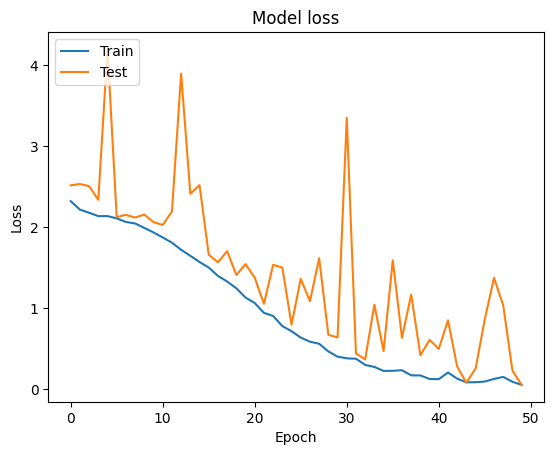

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# พยากรณ์ผลและสร้าง confusion matrix
y_pred = model.predict(XH_test)
y_pred_classes = y_pred.argmax(axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


In [ ]:
y_pred_classes

array([7, 3, 9, ..., 8, 7, 9])

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
import pandas as pd

# Convert y_pred to 1-dimensional by selecting the class with highest probability
y_pred_classes = y_pred.argmax(axis=1)

# Convert y_test to 1-dimensional (assuming it's already one-hot encoded)
y_test_classes = y_test.argmax(axis=1)

# Create DataFrame
df_results = pd.DataFrame({
    "Actual": y_test_classes,  # Use 1D array here
    "Predicted": y_pred_classes  # Use 1D array here
})

# Display the first 10 rows
print(df_results.head(10))

# Save to CSV
df_results.to_csv("prediction_results.csv", index=False)

   Actual  Predicted
0       7          7
1       3          3
2       9          9
3       3          3
4       1          1
5       3          3
6       9          9
7       0          0
8       8          8
9       7          7


In [ ]:
y_pred = model.predict(XH_test)  # ทำนายผล
y_pred_classes = np.argmax(y_pred, axis=1)  # แปลงเป็นคลาส (0-9)
y_test_classes = np.argmax(y_test, axis=1)  # แปลงค่าจริงเป็นคลาส (0-9)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
print("Unique classes in y_test:", np.unique(y_test_classes))
print("Unique classes in y_pred:", np.unique(y_pred_classes))


Unique classes in y_test: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_pred: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
y_pred_train = model.predict(XH_train)  # ทำนายผล
y_train_classes = np.argmax(y_pred_train, axis=1)  # แปลงเป็นคลาส (0-9)
y_train_classes = np.argmax(y_train, axis=1)  # แปลงค่าจริงเป็นคลาส (0-9)


148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


In [ ]:
print(confusion_matrix(y_train_classes, y_train_classes))
print(confusion_matrix(y_pred_classes, y_test_classes))

[[477   0   0   0   0   0   0   0   0   0]
 [  0 469   0   0   0   0   0   0   0   0]
 [  0   0 462   0   0   0   0   0   0   0]
 [  0   0   0 469   0   0   0   0   0   0]
 [  0   0   0   0 484   0   0   0   0   0]
 [  0   0   0   0   0 471   0   0   0   0]
 [  0   0   0   0   0   0 480   0   0   0]
 [  0   0   0   0   0   0   0 460   0   0]
 [  0   0   0   0   0   0   0   0 480   0]
 [  0   0   0   0   0   0   0   0   0 468]]
[[113   0   0   0   0   0   0   0   0   0]
 [  0 119   0   0   1   0   0   0   1   0]
 [  0   2 125   1   1   0   1   0   0   0]
 [  0   0   0 118   0   0   0   0   0   0]
 [  0   0   0   1 104   0   1   0   0   0]
 [  0   0   0   0   0 119   0   0   0   0]
 [  0   0   0   1   0   0 108   0   0   0]
 [  0   0   0   0   0   0   0 130   0   0]
 [  0   0   3   0   0   0   0   0 109   0]
 [  0   0   0   0   0   0   0   0   0 122]]


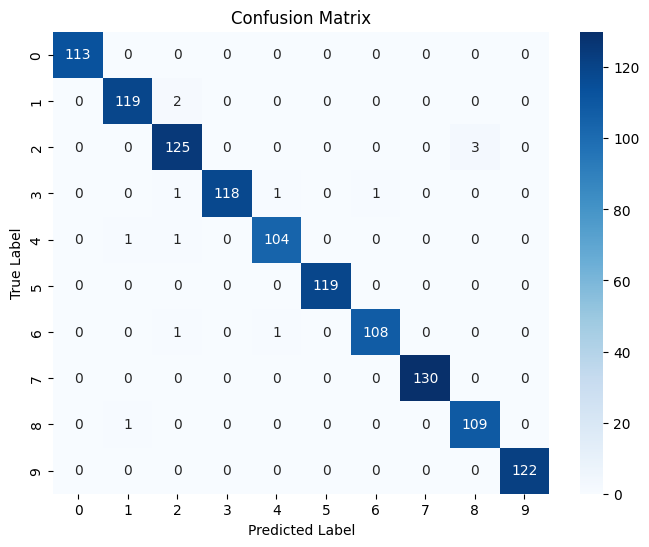

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# พล็อต heatmap ของ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# กำหนดชื่อคลาส (สามารถใช้ตัวเลข 0-9 หรือชื่อเฉพาะ)
class_labels = [str(i) for i in range(10)]  # ['0', '1', ..., '9']

# สร้างรายงานผล
report = classification_report(y_train_classes, y_train_classes, target_names=class_labels)
print("Classification Report:")
print(report)
report = classification_report(y_test_classes, y_pred_classes, target_names=class_labels)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00       469
           2       1.00      1.00      1.00       462
           3       1.00      1.00      1.00       469
           4       1.00      1.00      1.00       484
           5       1.00      1.00      1.00       471
           6       1.00      1.00      1.00       480
           7       1.00      1.00      1.00       460
           8       1.00      1.00      1.00       480
           9       1.00      1.00      1.00       468

    accuracy                           1.00      4720
   macro avg       1.00      1.00      1.00      4720
weighted avg       1.00      1.00      1.00      4720

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       0.98      0.98      0.98       121
           2       0.96      0.9